# HW 8:Clustering by K-Means 
## Sample solution
---

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

# Import a Beer data set to a dataframe

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1bjCoHPxe_96Ijoz8eCzYUikwlkPA6XDc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('beer.txt')

In [0]:
url = 'beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


#### Let's pick the feature set

In [0]:
# Define X.
X = beer.drop('name', axis=1)

#### Do we need to define a target called Y? Explain.

**Answer:** Y represents the labels in supervised learning. Because clustering is unsupervised, each input point has no target label. So, there is no Y needed for k-means.

<a id="k-means-clustering"></a>
### K-Means Clustering

#### K-means with three clusters

In [0]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review and show the cluster labels.

In [0]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int32)

####  Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


#### What feature(s) do the clusters seem to be based on? Why?

**Answer:** `calories`. Notice that the numbers in the `calories` column are very large in comparison with the other columns. Hence, these will affect the Euclidean distance calculation the most (especially because k-means squares the distance along each axis). The other columns are insignificant in comparison for calculating the distance from each centroid, so they matter much less.

#### Show the cluster centers.

In [0]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

#### Calculate the mean of each feature for each cluster.

In [0]:
# hint: 
# beer.groupby('cluster').mean()

#### Save the `mean` of cluster centers as 'centers'.

In [0]:
centers = beer.groupby('cluster').mean()

#### Create a "colors" array for plotting.

In [0]:

colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

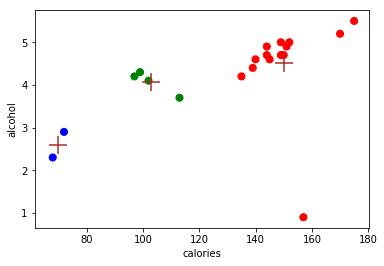

In [0]:
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='brown');

# Add labels
plt.xlabel('calories');
plt.ylabel('alcohol');

#### Create a scatter plot matrix (clusters should be colored as: 0=red, 1=green, 2=blue).

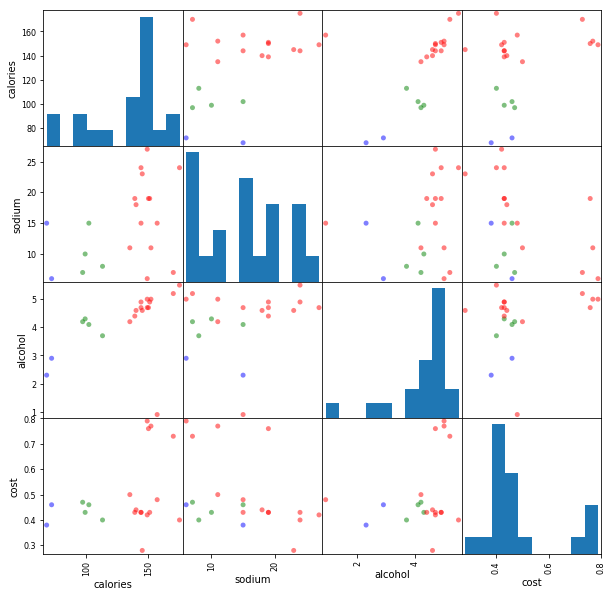

In [0]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

#### Use StandardScaler to scale the data X.

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.219647e-16,7.771561e-17,-1.003711e-15,-3.608225e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.186883e+00,-1.395248e+00,-3.149822e+00,-1.519224e+00
25%,-7.554993e-01,-8.496201e-01,-6.129894e-02,-4.745363e-01
50%,3.879133e-01,7.794680e-03,3.395018e-01,-4.214165e-01
75%,5.996564e-01,6.313691e-01,6.224200e-01,-6.728499e-02
max,1.438159e+00,1.878518e+00,1.188256e+00,2.092917e+00


#### Repeat K-means with three clusters on scaled data.

In [0]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

####  Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


#### What are the "characteristics" of each cluster?

**Answer:** One possible interpretation:

- Cluster 0: Regular beers
- Cluster 1: Light beers (lower calorie, lower alcohol)
- Cluster 2: Expensive (high cost)

#### Show the cluster centers.

In [0]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


#### Create scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

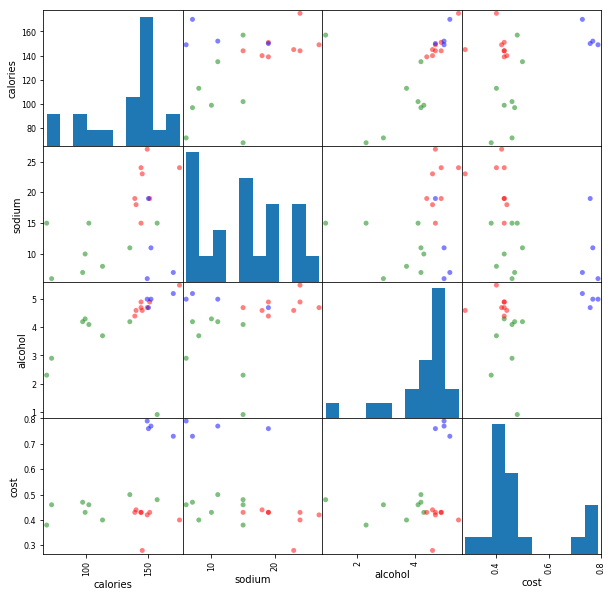

In [0]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue). (*optional*)

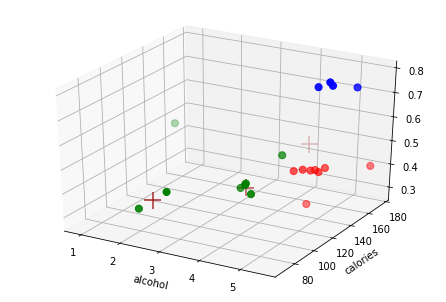

In [0]:
colors = np.array(['red', 'green',  'blue'])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter( beer.alcohol, beer.calories,beer.cost,c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
ax.scatter(centers.alcohol, centers.calories, centers.cost, linewidths=3, marker='+', c='brown', s=300);

# Add labels
plt.xlabel('alcohol');
plt.ylabel('calories');

####  Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that `sodium` is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)   

Try a range of K and plot both the Inertia Over K and Silhouette Over K curves.

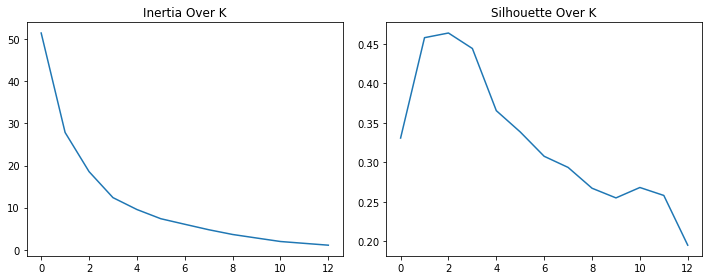

In [0]:
values = range(2,15)
scores = []
for value in values:        
    model = KMeans(n_clusters = value)
    model.fit(X_scaled)
    score    = silhouette_score(X_scaled, model.labels_)
    inertia = model.inertia_
    scores.append({
                    "inertia":    inertia,
                    "silhouette": score
                })

eval_scores = pd.DataFrame(scores)
eval_scores.head()

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
eval_scores["inertia"].plot(ax=ax[0], title="Inertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")

fig.tight_layout()

#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



**Answer**
1. There is an elbow
2. The best value of K is 3 (2 +1)

#### Repeat K-means with 2 clusters on scaled data.(*optional*)

In [0]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

####  Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
16,Hamms,139,19,4.4,0.43,0
10,Coors,140,18,4.6,0.44,0


#### What are the "characteristics" of each cluster?

**Answer:** One possible interpretation:

- Cluster 0: Regular beers
- Cluster 1: Light beers (lower calorie, lower alcohol)
- Cluster 2: Expensive (high cost)

#### Show the cluster centers.

In [0]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,149.461538,17.153846,4.8,0.523846
1,101.142857,10.857143,3.2,0.440000


The above table shows cluster 0/**1**  have high/**low** values for all of the 4 features.